## 对数据问题的思考

> **1:** 对于不同年龄阶段的人，生还率是否存在差异？

> **2:** 男性跟女性之间的生还率是否存在差异？

> **3:** 购买不同等级票价的人，生还率是否存在差异？

> **4:** 从不同港口登船的人，生还率是否存在差异？

> **5:** 和亲属一起登船的人，生还率与平均生还率是否存在差异？

> **6:** 购买不同等级仓位的乘客的年龄分布情况如何？

## 读取csv数据

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 对数据进行初步分析和处理
**1:** 查看总人数，以及男性和女性分别的有多少人

In [2]:
male_data = titanic_data[titanic_data['Sex'] == 'male'] 
female_data = titanic_data[titanic_data['Sex'] == 'female'] #根据性别分组，将男性数据赋值给male_data，女性数据赋值给female_data
print '总人数为{}人'.format(len(titanic_data))
print '男性人数为{}人'.format(len(male_data))
print '女性人数为{}人'.format(len(female_data))

总人数为891人
男性人数为577人
女性人数为314人


**2：**查看年龄分布情况

In [3]:
age_series = titanic_data['Age'].dropna()
age_data = titanic_data.loc[list(age_series.index.values)]
age_data['Age'].describe() #丢弃年龄为缺失的数据，得到年龄数据组age_data，并查看年龄的分布情况

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

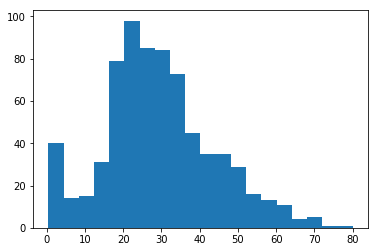

In [4]:
%matplotlib inline
plt.hist(age_data['Age'], bins = 20)

**3：**查看平均存活率

In [5]:
sur_rate_average = len(titanic_data[titanic_data['Survived'] == 1]) / float(len(titanic_data))
print '泰坦尼克号上乘客的平均存活率为{:.2%}'.format(sur_rate_average)

泰坦尼克号上乘客的平均存活率为38.38%


## 对数据问题的一些分析（对所提出的问题进行分析）

**1：**查看性别因素对存活率的影响

In [54]:
sur_male_rate = male_data['Survived'].mean() #计算男性存活率
print '泰坦尼克上男性乘客共{}名，存活率为{:.2%}'.format(len(male_data), sur_male_rate)

泰坦尼克上男性乘客共577名，存活率为18.89%


In [55]:
sur_female_rate = female_data['Survived'].mean() #计算女性存活率
print '泰坦尼克上女性乘客共{}名，存活率为{:.2%}'.format(len(female_data), sur_female_rate)

泰坦尼克上女性乘客共314名，存活率为74.20%


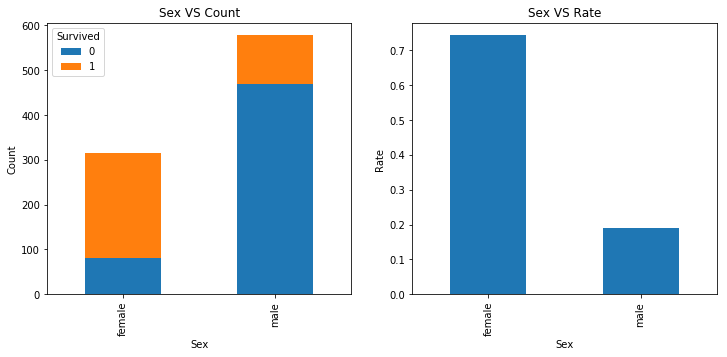

In [60]:
%matplotlib inline
fig = plt.figure(figsize = (12,  5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sex_vs_count = titanic_data.groupby(['Sex', 'Survived']).count()['PassengerId']
sex_vs_count.unstack().plot(kind = 'bar', stacked = True, ax  = ax1)
ax1.set_title('Sex VS Count')
ax1.set_ylabel('Count')
sex_vs_rate = titanic_data.groupby('Sex').mean()['Survived']
sex_vs_rate.plot(kind = 'bar', ax = ax2)
ax2.set_title('Sex VS Rate')
ax2.set_ylabel('Rate')
plt.show()

**小结：**泰坦尼克号上女性乘客的存活率远高于男性，且显著高于平均存活率。判断在逃生时，侧重于让女性优先逃生。

**2：**查看年龄对存活率的影响

（1）查看幸存乘客的年龄分布情况

In [8]:
sur_age_data = age_data[age_data['Survived'] == 1] #获取登记有年龄的幸存者的数据
sur_age_data['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

(array([ 27.,   9.,   4.,  15.,  27.,  36.,  30.,  35.,  35.,  17.,  12.,
         12.,  14.,   7.,   5.,   4.,   0.,   0.,   0.,   1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

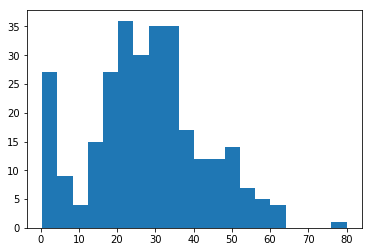

In [9]:
%matplotlib inline
plt.hist(sur_age_data['Age'], bins = 20)

**小结：**幸存乘客的年龄分布情况与全部乘客的年龄分布情况近似，从直方图上看，幸存乘客中儿童的分布数量略多于全部乘客中儿童的分布数量

（2）查看不同年龄阶段的乘客的存活率情况

In [10]:
list_age = []
age = 0
for i in range(9):
    list_age.append(age)
    age = age + 10
age_series_group = pd.cut(age_data['Age'], bins = np.array(list_age)) #将乘客的年龄按阶段进行分组，每十岁分为一个组(0-80岁，共8组)
age_data['AgeGroup'] = age_series_group #将年龄的分组信息加入登记有年龄的乘客数据框中
age_group = age_data.groupby('AgeGroup') #按照年龄阶段将乘客数据分组
surrate_age_group = age_group.sum()['Survived'] / age_group.size()
surrate_age_group

AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
dtype: float64

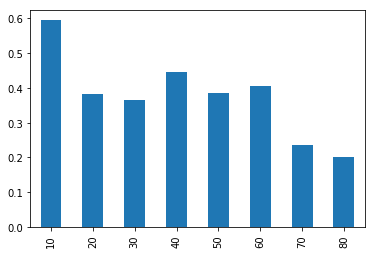

In [18]:
%matplotlib inline
surrate_age_group.plot(kind = 'bar')

**小结：**将乘客按年龄分为8组（每十岁分为一个组），可以看出，存活率近似于随着年龄组的增大而减小，其中10岁以下乘客的存活率远高于平均存活率，判断在逃生时，侧重于让儿童优先逃生。

**3：**查看不同等级舱位对存活率的影响

In [28]:
pclass_data = titanic_data.groupby('Pclass') #根据Pclass的值按仓位等级将数据分组,并分别计算出1、2、3等仓乘客的存活率
for i in range(3):
    print '购买{}等舱位的乘客共{}人，存活率为{:.2%}'.format(i+1, pclass_data['PassengerId'].count()[i+1], pclass_data['Survived'].mean()[i+1])

购买1等舱位的乘客共216人，存活率为62.96%
购买2等舱位的乘客共184人，存活率为47.28%
购买3等舱位的乘客共491人，存活率为24.24%


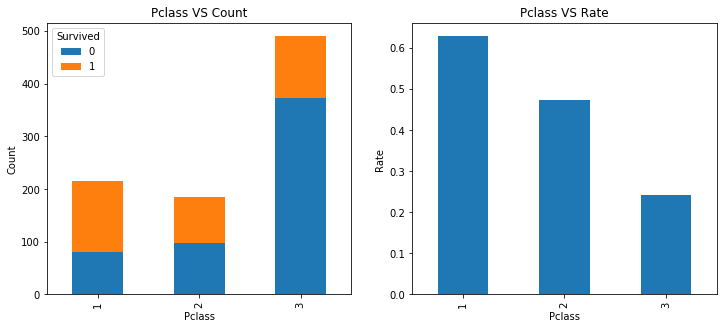

In [63]:
%matplotlib inline
fig = plt.figure(figsize = (12,  5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
em_vs_count = titanic_data.groupby(['Pclass', 'Survived']).count()['PassengerId']
em_vs_count.unstack().plot(kind = 'bar', stacked = True, ax  = ax1)
ax1.set_title('Pclass VS Count')
ax1.set_ylabel('Count')
sex_vs_rate = titanic_data.groupby('Pclass').mean()['Survived']
sex_vs_rate.plot(kind = 'bar', ax = ax2)
ax2.set_title('Pclass VS Rate')
ax2.set_ylabel('Rate')
plt.show()

**小结：**可以看出，存活率随着仓位等级的升高而增加。因此，判断在逃生时，可能高等级仓位的乘客优先逃生，或者高等级仓位距离逃生出口较近，而低等级仓位距离逃生出口较远。

**4：**查看不同登船港口对存活率的影响

In [30]:
embarked_data = titanic_data.groupby('Embarked') #根据Embarked的值按登船港口将数据分组
embarked_S_sur_rate = embarked_data['Survived'].mean()['S']
embarked_Q_sur_rate = embarked_data['Survived'].mean()['Q']
embarked_C_sur_rate = embarked_data['Survived'].mean()['C'] #分别计算出从三个港口登船的乘客的存活率
embarked_rate_list = [embarked_S_sur_rate, embarked_Q_sur_rate, embarked_C_sur_rate]
embarked_num_list = [embarked_data['PassengerId'].count()['S'], embarked_data['PassengerId'].count()['Q'],embarked_data['PassengerId'].count()['C']]
s = ['Southampton', 'Queenstown', 'Cherbourg']
for i in range(3):
    print '在{}港口登船的乘客共{}人，存活率为{:.2%}'.format(s[i], embarked_num_list[i], embarked_rate_list[i])

在Southampton港口登船的乘客共644人，存活率为33.70%
在Queenstown港口登船的乘客共77人，存活率为38.96%
在Cherbourg港口登船的乘客共168人，存活率为55.36%


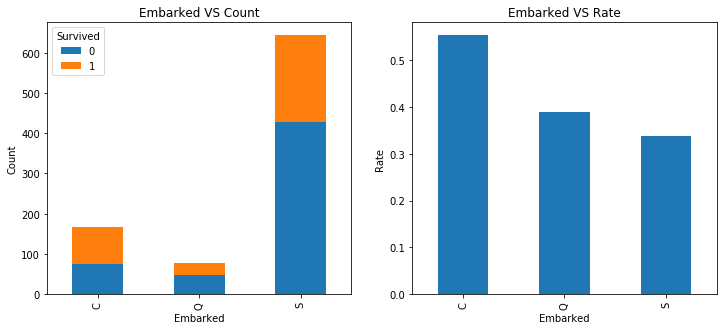

In [62]:
%matplotlib inline
fig = plt.figure(figsize = (12,  5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
em_vs_count = titanic_data.groupby(['Embarked', 'Survived']).count()['PassengerId']
em_vs_count.unstack().plot(kind = 'bar', stacked = True, ax  = ax1)
ax1.set_title('Embarked VS Count')
ax1.set_ylabel('Count')
sex_vs_rate = titanic_data.groupby('Embarked').mean()['Survived']
sex_vs_rate.plot(kind = 'bar', ax = ax2)
ax2.set_title('Embarked VS Rate')
ax2.set_ylabel('Rate')
plt.show()

**小结：**在Cherbourg港口登船的乘客的存活率显著高于其余两个港口登船乘客的存活率，且高于平均存活率，判断Cherbourg港口登船的乘客所在仓位可能距离逃生出口较近

**5：**查看和亲属一起登船的人的存活率情况

In [14]:
family_data = titanic_data[(titanic_data['SibSp'] != 0) | (titanic_data['Parch'] != 0)] #筛选出和亲属一起登船的人的数据
print '和亲属一起登船的乘客共{}人，存活率为{:.2%}'.format(len(family_data) ,float(family_data['Survived'].sum()) / len(family_data))

和亲属一起登船的乘客共354人，存活率为50.56%


**小结：**和亲属一起登船的乘客共142人，其存活率显著高于平均存活率，判断在逃生时，可能优先让与亲属一起登船的乘客逃生

**6：**分析购买不同等级舱位的人的年龄情况

In [15]:
age_pclass_data = age_data.groupby('Pclass') #将具有登记有年龄的乘客数据的根据舱位分组
age_pclass_data['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


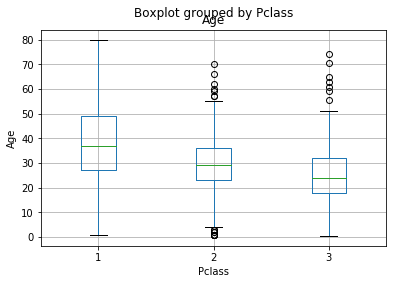

In [67]:
%matplotlib inline
age_data.boxplot(by = 'Pclass', column = 'Age') #分别画出购买1、2、3等舱位乘客的年龄分布情况的箱型图
plt.ylabel('Age')
plt.show()

**小结：**可以看出，购买一等舱位乘客的年龄均值为38岁，年龄分布主要在二十岁至六十岁之间；购买二等舱位的乘客的年龄均值为29岁，年龄分布主要在20岁至四十岁之间；购买三等舱位乘客的年龄均值为25岁，年龄分布集中在二十岁至三十岁左右。该分布情况符合社会一般规律，即，随着人群年龄的增加，其财富水平也越高（财富积累越多，购买力越强）

## 结论
根据对所提出问题进行的数据分析，可以得出以下结论：
在关于影响存活率的因素中，性别对存活率有较大影响，远远高于男性，判断在逃生时，优先让女性逃生。在不同舱位以及不同港口登船的乘客中，存活率随着舱位等级的升高而增加。因此，判断在逃生时，可能高等级舱位的乘客优先逃生，或者高等级舱位距离逃生出口较近，而低等级舱位距离逃生出口较远，而在Cherbourg港口登船的乘客的存活率高于其余两个港口登船乘客的存活率，且高于平均存活率，判断Cherbourg港口登船的乘客所在仓位可能距离逃生出口较近。
对于年龄对存活率的影响，可以看出10岁以下乘客的年龄存活率显著高于其他年龄阶段乘客的存活率，判断在逃生时，侧重于让儿童优先逃生。但是需要说明的是，在所获取的数据中，只有714名乘客登记有年龄信息，有177名没有年龄信息，因此该项数据的准确性存在一定限制。
此外，根据购买不同舱位的乘客的年龄分布可以看出，购买高等级的舱位的乘客年龄集中阶段大于购买低等级舱位的乘客年龄集中阶段，可以看出随着人群年龄的增加，其财富水平也越高（财富积累越多，购买力越强）。同样地，该项数据的准确性受到部分缺失年龄信息的乘客数据的限制。